<a href="https://colab.research.google.com/github/chirudukuru/cvd-Covid19/blob/main/CVD_DescionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardiovascularcovid.csv to cardiovascularcovid.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cardiovascularcovid.csv']))

In [ ]:
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Case                               51 non-null     object 
 1   Age                                51 non-null     int64  
 2   Smoking                            51 non-null     int64  
 3   COVID-19                           51 non-null     int64  
 4   Temperature                        51 non-null     float64
 5   Cough                              51 non-null     int64  
 6   Headache                           51 non-null     int64  
 7   Sore throat                        51 non-null     int64  
 8   Oxigen saturation (%)              51 non-null     int64  
 9   Heartrateminute                    51 non-null     int64  
 10  Respiratory ratw (breaths minute)  51 non-null     int64  
 11  Critical status                    51 non-null     int64  
 

In [ ]:
df

,Case,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
0,Patient 1,59,1,1,36.2,1,1,1,95,80,16,1,0,95,21,120,70,0,0,1
1,Patient 2,52,1,1,37.8,0,0,0,99,115,18,3,1,99,24,70,40,1,4,1
2,Patient 3,58,1,0,37.5,1,0,0,94,82,16,1,0,94,21,110,70,1,0,1
3,Patient 4,55,1,1,39.5,1,0,0,96,89,18,2,1,96,21,110,80,1,1,1
4,Patient 5,40,1,1,38.0,1,1,0,98,90,15,2,0,98,21,115,70,0,0,1
5,Patient 6,49,1,1,38.1,1,0,0,93,100,22,3,1,93,35,120,70,1,6,1
6,Patient 7,44,1,0,36.7,0,0,0,98,78,18,1,0,98,21,135,90,0,0,1
7,Patient 8,51,1,1,39.4,1,0,1,96,124,24,3,0,96,21,130,75,1,0,1
8,Patient 9,58,1,1,35.5,1,0,0,95,117,43,3,1,95,60,177,80,0,1,3
9,Patient 10,67,1,1,37.8,1,0,0,90,90,16,2,0,90,21,141,74,0,0,1


In [ ]:
df['Outcome'],target_names = pd.factorize(df['Outcome'])

In [ ]:
print(target_names)
print(df['Outcome'].unique())

Int64Index([1, 3, 2], dtype='int64')
[0 1 2]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Case                               51 non-null     object 
 1   Age                                51 non-null     int64  
 2   Smoking                            51 non-null     int64  
 3   COVID-19                           51 non-null     int64  
 4   Temperature                        51 non-null     float64
 5   Cough                              51 non-null     int64  
 6   Headache                           51 non-null     int64  
 7   Sore throat                        51 non-null     int64  
 8   Oxigen saturation (%)              51 non-null     int64  
 9   Heartrateminute                    51 non-null     int64  
 10  Respiratory ratw (breaths minute)  51 non-null     int64  
 11  Critical status                    51 non-null     int64  
 

In [ ]:
df['Case'],_ = pd.factorize(df['Case'])
df['Age'],_ = pd.factorize(df['Age'])
df['Smoking '],_ = pd.factorize(df['Smoking '])
df['COVID-19'],_ = pd.factorize(df['COVID-19'])
df['Temperature '],_ = pd.factorize(df['Temperature '])
df['Cough'],_ = pd.factorize(df['Cough'])
df['Headache'],_ = pd.factorize(df['Headache'])
df['Sore throat'],_ = pd.factorize(df['Sore throat'])
df['Oxigen saturation (%)'],_ = pd.factorize(df['Oxigen saturation (%)'])
df['Heartrateminute'],_ = pd.factorize(df['Heartrateminute'])
df['Respiratory ratw (breaths minute)'],_ = pd.factorize(df['Respiratory ratw (breaths minute)'])
df['Critical status'],_ = pd.factorize(df['Critical status'])
df['ICU'],_ = pd.factorize(df['ICU'])
df['Oxigen  (%)'],_ = pd.factorize(df['Oxigen  (%)'])
df['Frac oxygen  (%)'],_ = pd.factorize(df['Frac oxygen  (%)'])
df['Systolic b.p (mmHg) '],_ = pd.factorize(df['Systolic b.p (mmHg) '])
df['Diastolic b.p (mmHg)'],_ = pd.factorize(df['Diastolic b.p (mmHg)'])
df['Bilateral pulmonary '],_ = pd.factorize(df['Bilateral pulmonary '])
df['Length of ICU stay (days)'],_ = pd.factorize(df['Length of ICU stay (days)'])
df['Outcome'],_ = pd.factorize(df['Outcome'])
df.head()

,Case,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,2,2,0,1,2,0,1,1,2,2,0,0,0,2,0,2,0,1,0,0
3,3,3,0,0,3,0,1,1,3,3,1,2,1,3,0,2,2,1,2,0
4,4,4,0,0,4,0,0,1,4,4,2,2,0,4,0,3,0,0,0,0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 6
Accuracy: 0.62


In [ ]:
import graphviz

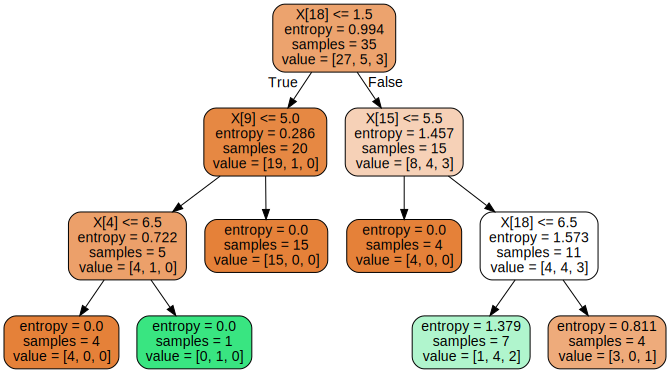

In [ ]:
dot_df = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True)
graph = graphviz.Source(dot_df)  
graph